In [44]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
# Read dataset
df = pd.read_csv('The_Reserve_PPR.csv')
df['Review Text'] = df['Review Text'].astype('str') # Convert column into string/object
df['Review Text'] = df['Review Text'].str.replace('\d+', '') # Remove digits
df.dropna(subset=['Review Text'], inplace=True, how='all', axis=0)
train = df['Review Text']
#msk = np.random.rand(len(df)) < 0.9
#
#train = df[msk]['Review Text']
#print(len(train))
#test = df[~msk]['Review Text']
#print(len(test))

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train)


In [46]:
# Instantiate K-means model object
true_k = 10
y_labels = [str(i) for i in range(true_k)]
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
results = kmeans.fit(X)

In [47]:
results = kmeans.predict(X)

[[  919.3355   -1126.4216  ]
 [ -622.55334  -1341.6047  ]
 [-1693.3073    1228.4285  ]
 [ 1099.3363    1634.0233  ]
 [-1650.5999    -424.25262 ]
 [ -826.61914    443.59805 ]
 [   30.271242  -331.3811  ]
 [ 1378.7958     178.4118  ]
 [ -415.49878   1853.7001  ]
 [  269.1748     799.70013 ]]


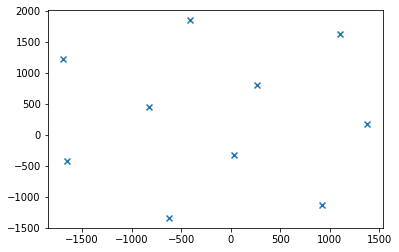

In [49]:
# Plot model centroids
centroids = kmeans.cluster_centers_
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 42
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model.fit_transform(centroids)
print (transformed_centroids)

plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.show()

In [50]:
print("Top 5 terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :5]:
        print (' %s' % terms[ind])
    print()

Top 5 terms per cluster:
Cluster 0:
 yesica
 reyes
 excellent
 samuel
 thank

Cluster 1:
 beautiful
 nice
 good
 beach
 hotel

Cluster 2:
 great
 service
 staff
 food
 time

Cluster 3:
 beach
 room
 reserve
 resort
 kids

Cluster 4:
 boy
 happy
 alejandro
 maria
 fun

Cluster 5:
 love
 place
 zenova
 second
 amazing

Cluster 6:
 amazing
 best
 service
 recommend
 hotel

Cluster 7:
 nan
 óscar
 fiancee
 ferdinand
 fernandi

Cluster 8:
 reserve
 palma
 real
 paradisus
 beach

Cluster 9:
 family
 resort
 concierge
 time
 wonderful

